In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
X = torch.randn([100, 10]).float()

In [3]:
X

tensor([[ 1.9763e-01, -3.9355e-01,  1.7694e+00,  3.4246e-01, -1.6153e-02,
         -1.5386e+00,  1.2306e+00, -7.6709e-01,  1.2203e-01,  3.7935e-01],
        [ 8.2829e-01,  1.3086e+00, -8.2257e-01, -8.4997e-01, -1.1727e+00,
          3.8711e-01,  6.1900e-02, -2.5356e-01, -4.0772e-02,  1.2566e+00],
        [-4.5775e-01,  2.5564e-01, -6.8721e-01, -4.1423e-01,  4.8839e-01,
          3.6686e-02, -6.1963e-01, -2.6220e-01,  8.9592e-01,  1.0112e+00],
        [-1.8192e+00, -4.3745e-03, -1.4895e-01,  8.6457e-02,  4.5153e-01,
         -1.5235e-01,  5.1791e-01,  9.2085e-01,  1.1821e+00,  3.7928e-01],
        [-8.9536e-01, -4.5721e-01, -2.7043e-01,  1.8255e+00,  3.9345e-01,
          1.0792e+00, -6.1294e-01, -4.0813e-01,  6.2017e-01, -4.7901e-01],
        [-1.7968e-01, -1.1356e+00,  1.9950e-01,  6.1750e-01, -1.5542e+00,
          2.1957e-01,  3.3592e-01, -8.0720e-01,  4.5510e-01, -8.2891e-01],
        [-1.6930e+00,  7.1554e-01,  5.5320e-01, -2.2832e-01,  2.1104e-01,
         -1.5266e+00,  1.1279e+0

In [4]:
A = torch.rand(10)
A

tensor([0.9426, 0.6205, 0.8818, 0.0046, 0.1259, 0.5600, 0.7772, 0.4101, 0.9307,
        0.3762])

In [5]:
Y =  X @ A

### Goal is to automatically figure out the function Y given X

Let us start by randomly initializing a function F(X) with random set of weights

In [6]:
def mse(y, y1):
    
    return sum((y-y1)**2)/len(y)

def relu(X):
    return X.clamp_min(0)

def grad_mse(y, y1):
    return (y-y1) / (2 * len(Y))

def grad_relu(outg, inp):
    return outg * (inp > 0).float()

def grad_linear(outg, inp, w):
    grad_w = inp.t() @ outg
    grad_inp = outg @ w.t()
    return grad_inp, grad_w

In [7]:
W1 = torch.randn([10, 5])
W2 = torch.randn([5, 1])
B1 = torch.ones([100, 1])
B2 = torch.ones([100, 1])

In [8]:
G = X @ W1 + B1
A = relu(G)
preds = A @ W2 + B2
print("loss is", mse(Y, preds.flatten()))

loss is tensor(33.6753)


In [9]:
grad_output = grad_mse(Y, preds.flatten())
grad_output, grad_output.shape

(tensor([-0.0567, -0.0105,  0.0173, -0.0366, -0.0245, -0.0440, -0.0359, -0.0187,
         -0.0075, -0.0179, -0.0184, -0.0412, -0.0044, -0.0250, -0.0066, -0.0180,
         -0.0063,  0.0047, -0.0271,  0.0029, -0.0178,  0.0034, -0.0355, -0.0119,
         -0.0284, -0.0434, -0.0270, -0.0604, -0.0250, -0.0153, -0.0131, -0.0409,
          0.0146, -0.0388, -0.0225, -0.0199, -0.0122, -0.0801, -0.0262, -0.0279,
         -0.0102, -0.0250, -0.0561,  0.0004, -0.0114, -0.0422, -0.0084,  0.0124,
         -0.0153,  0.0088, -0.0459,  0.0112, -0.0605, -0.0340, -0.0214, -0.0143,
         -0.0063, -0.0029, -0.0133, -0.0381, -0.0133,  0.0064, -0.0429, -0.0434,
         -0.0462, -0.0021, -0.0379, -0.0433, -0.0313, -0.0105, -0.0005, -0.0051,
         -0.0086,  0.0015, -0.0593, -0.0358, -0.0128, -0.0288, -0.0245,  0.0095,
         -0.0299, -0.0580,  0.0097, -0.0167, -0.0052, -0.0183, -0.0111, -0.0359,
         -0.0043, -0.0395,  0.0035, -0.0162, -0.0081, -0.0004,  0.0039, -0.0035,
         -0.0696, -0.0150, -

In [10]:
grad_output = grad_output[:, None]

In [11]:
grad_acts, grad_w2 = grad_linear(grad_output, A, W2)
grad_acts, grad_w2, grad_acts.shape, grad_w2.shape

(tensor([[ 5.7585e-02, -6.4587e-02,  1.5714e-02, -1.0818e-01, -5.5671e-03],
         [ 1.0655e-02, -1.1951e-02,  2.9077e-03, -2.0018e-02, -1.0301e-03],
         [-1.7608e-02,  1.9749e-02, -4.8049e-03,  3.3079e-02,  1.7022e-03],
         [ 3.7119e-02, -4.1633e-02,  1.0129e-02, -6.9736e-02, -3.5886e-03],
         [ 2.4909e-02, -2.7938e-02,  6.7974e-03, -4.6796e-02, -2.4081e-03],
         [ 4.4699e-02, -5.0134e-02,  1.2198e-02, -8.3975e-02, -4.3213e-03],
         [ 3.6435e-02, -4.0866e-02,  9.9427e-03, -6.8450e-02, -3.5224e-03],
         [ 1.9023e-02, -2.1337e-02,  5.1912e-03, -3.5739e-02, -1.8391e-03],
         [ 7.6532e-03, -8.5838e-03,  2.0885e-03, -1.4378e-02, -7.3988e-04],
         [ 1.8136e-02, -2.0342e-02,  4.9492e-03, -3.4073e-02, -1.7533e-03],
         [ 1.8721e-02, -2.0998e-02,  5.1088e-03, -3.5172e-02, -1.8099e-03],
         [ 4.1785e-02, -4.6867e-02,  1.1403e-02, -7.8502e-02, -4.0396e-03],
         [ 4.4752e-03, -5.0194e-03,  1.2212e-03, -8.4075e-03, -4.3264e-04],
         [ 2

In [12]:
grad_G = grad_relu(grad_acts, G)
grad_G.shape

torch.Size([100, 5])

In [13]:
_, grad_w1 = grad_linear(grad_G, X, W1)
grad_w1, grad_w1.shape

(tensor([[-7.5071e-01, -1.3717e-01, -1.8810e-01,  1.4201e+00,  2.2163e-02],
         [ 1.0228e-01, -4.2696e-01,  7.5405e-02, -2.4799e-01, -2.9607e-02],
         [ 1.7166e-01, -2.5425e-01,  1.4039e-01, -1.1642e+00, -2.7978e-02],
         [ 4.8359e-02, -4.1591e-01,  8.3684e-02, -7.5227e-01,  4.5258e-04],
         [ 3.6279e-01,  5.3484e-01,  2.1366e-02,  3.5179e-01,  4.6151e-02],
         [-3.4041e-01, -4.6411e-02, -1.5092e-01,  1.2520e+00,  3.4339e-02],
         [ 2.0002e-01, -2.3759e-01,  1.4648e-01, -1.3422e+00, -8.6710e-02],
         [-3.2669e-02, -4.4840e-02,  5.8483e-02, -7.8047e-01, -8.6473e-04],
         [-3.3987e-02, -6.3866e-01,  1.0541e-02, -1.3437e+00, -5.6729e-02],
         [-2.2574e-01,  1.5027e+00, -2.9809e-01,  1.6171e+00,  7.0258e-02]]),
 torch.Size([10, 5]))

# Now let's run everything together

In [14]:
lr = 0.1
for i in range(100):
    G = X @ W1 + B1
    A = relu(G)
    preds = A @ W2 + B2
    print("loss is", mse(Y, preds.flatten()))
    grad_output = grad_mse(preds.flatten(), Y)
    grad_output = grad_output[:, None]
    grad_acts, grad_w2 = grad_linear(grad_output, A, W2)
    grad_G = grad_relu(grad_acts, G)
    _, grad_w1 = grad_linear(grad_G, X, W1)

    # now update the weights
    W1 = W1 - lr * (grad_w1)
    W2 = W2 - lr * (grad_w2)

loss is tensor(33.6753)
loss is tensor(8.0889)
loss is tensor(6.0300)
loss is tensor(4.8019)
loss is tensor(4.0088)
loss is tensor(3.4585)
loss is tensor(3.0472)
loss is tensor(2.7353)
loss is tensor(2.4949)
loss is tensor(2.3030)
loss is tensor(2.1459)
loss is tensor(2.0189)
loss is tensor(1.9125)
loss is tensor(1.8225)
loss is tensor(1.7444)
loss is tensor(1.6767)
loss is tensor(1.6162)
loss is tensor(1.5623)
loss is tensor(1.5144)
loss is tensor(1.4706)
loss is tensor(1.4303)
loss is tensor(1.3930)
loss is tensor(1.3584)
loss is tensor(1.3261)
loss is tensor(1.2959)
loss is tensor(1.2675)
loss is tensor(1.2409)
loss is tensor(1.2159)
loss is tensor(1.1925)
loss is tensor(1.1703)
loss is tensor(1.1493)
loss is tensor(1.1294)
loss is tensor(1.1105)
loss is tensor(1.0923)
loss is tensor(1.0744)
loss is tensor(1.0575)
loss is tensor(1.0414)
loss is tensor(1.0261)
loss is tensor(1.0114)
loss is tensor(0.9971)
loss is tensor(0.9835)
loss is tensor(0.9705)
loss is tensor(0.9579)
loss is te

In [18]:
Y.ndim = property(lambda x: len(x.shape))
preds.ndim = property(lambda x: len(x.shape))

TypeError: '>' not supported between instances of 'property' and 'int'

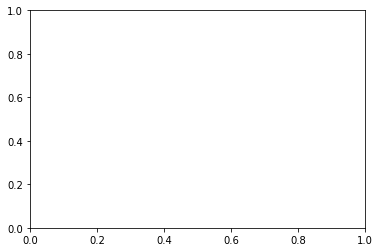

In [20]:
plt.plot(Y, output)